In [1]:
from micrograd.neural_network import MLP
from micrograd.engine import Value
from traceGraph import traceGraph

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
np.random.seed(1337)

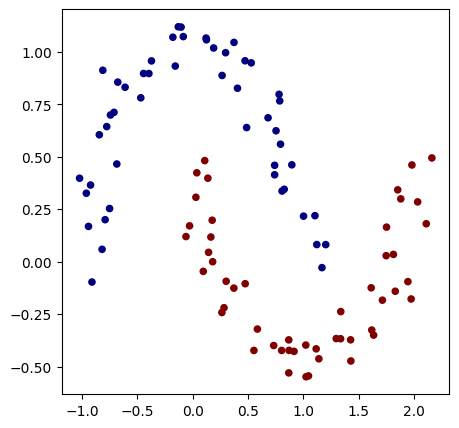

In [9]:
# make up a dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples= 100, noise=0.1)
y=y*2-1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='jet')

In [11]:
model = MLP(2,[16, 16, 1]) # 2layer neural network
print("number of parameters", len(model.parameters()))
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()

number of parameters 337


In [12]:
# demo to run the loss function
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    

In [3]:
a = Value(-6.0)
b = Value(5.0)
c = a + b
d = a * b + b**2
c += c + 1
c += 1 + c + (-a)
d += d * 2 + (b + a).relu()
d += 3 * d + (b - a).relu()
e = c - d
f = e**2
h = (b-a).relu()
g = f / 3.0
g += 10.0 / f
print(f'{g.data}') # prints 972.0034293552812, the outcome of this forward pass
g.backward()
print(f'{a.grad}') # prints -2016, i.e. the numerical value of dg/da
print(f'{b.grad}') # prints 1620, i.e. the numerical value of dg/db


972.0034293552812
-2016.0
-1620.0


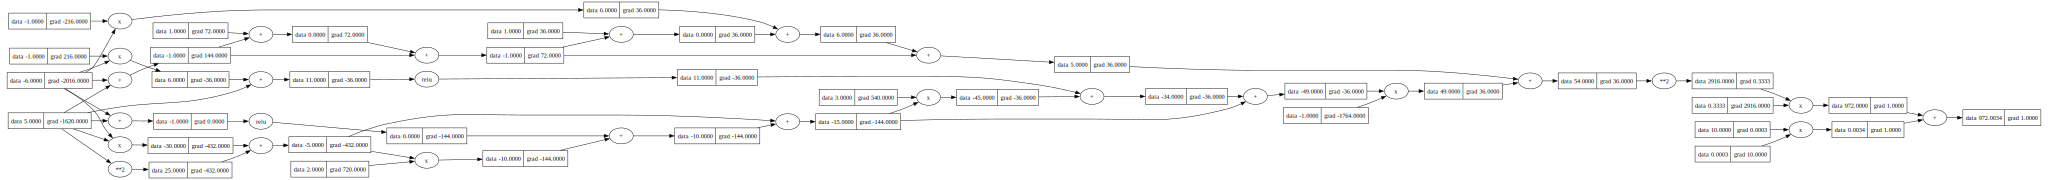

In [4]:
traceGraph().draw_dot(g) # draws the graph for the backward propogation for 'g' 